In [1]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns
from tqdm import tqdm_notebook

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'y']

In [10]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Benj3037/M3-Group-Assignment-1/main/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##Basic EDA

In [14]:
df.shape

(506, 14)

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df.isnull().sum()  #Counting the no.of null respect to the features or columns

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
y          0
dtype: int64

###Bivariate analysis


In [17]:
corr = df.corr()

<Axes: >

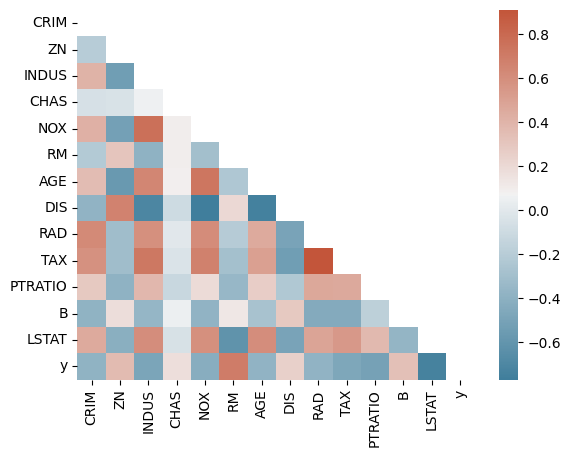

In [18]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask=mask, cmap=cmap)

## Preprocessing

We preprocess the data by standardising it and then we split into a train and test set using standard settings.

In [19]:
# Split the dataset
X = df.drop('y', axis=1) # X everything execpt price
y = df['y'] # price

In [23]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler # Importing the MinMaxScaler class from the preprocessing module of the sklearn library.

# Scaling the features in the dataset X using the fit_transform method of the MinMaxScaler object.
# This method computes the minimum and maximum values of the features in X and then scales the data accordingly.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_s = pd.DataFrame(X_scaled, columns=X.columns) # Converting the scaled data, X_scaled, into a pandas DataFrame with column names taken from X.

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)